In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas import ExcelFile

In [3]:
df = pd.read_excel('VN Index Historical Data Tree.xlsx')
df2 = df['Price']
df2 = pd.DataFrame(df2)     
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,1417.08,1412.15,1417.27,1402.18,753.56K,0.0061
1,2021-07-02,1420.27,1422.89,1424.28,1415.82,706.83K,0.0023
2,2021-07-05,1411.13,1420.27,1421.52,1394.12,774.45K,-0.0064
3,2021-07-06,1354.79,1411.13,1418.99,1354.79,773.51K,-0.0399
4,2021-07-07,1388.55,1354.79,1388.55,1334.58,733.80K,0.0249


In [4]:
# Prediction 3 months into the future.
future_days = 58
df2['Prediction'] = df2['Price'].shift(-future_days)
df2.head()

,Price,Prediction
0,1417.08,1352.76
1,1420.27,1351.17
2,1411.13,1324.99
3,1354.79,1339.31
4,1388.55,1339.21


In [5]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
y = np.array(df2['Prediction'])[:-future_days]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15200\2978037697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [7]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [8]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15200\3447370556.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


In [9]:
predictions = tree_prediction 
predictions_2 = lr_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DELL\AppData\Local\Temp\ipykernel_15200\212474267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


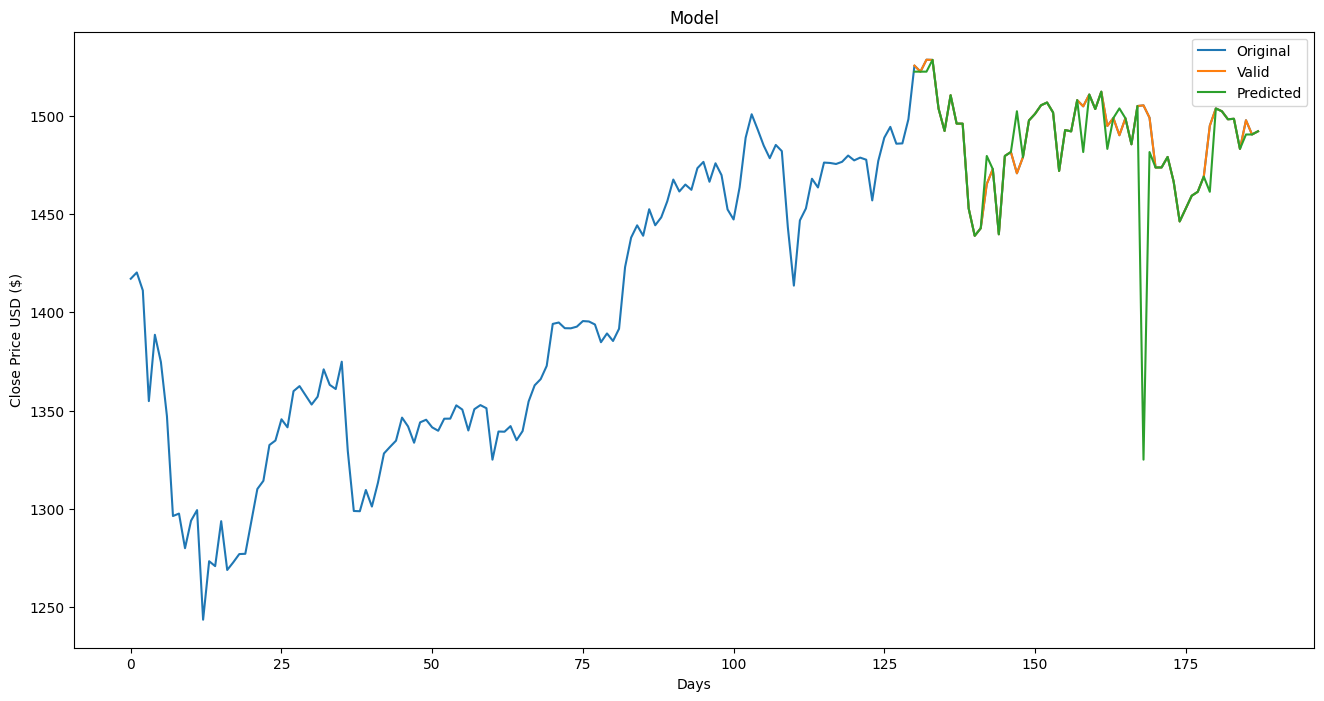

In [10]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()